In [52]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full column content
pd.set_option('display.width', 1000)        # Prevent line breaking

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\HP\Desktop\PortfolioProject\movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [60]:
# Handle missing values in the 'budget' column using grouped median imputation.
# Rationale: Budgets often vary by genre (e.g., action vs. drama) and year (due to inflation or industry trends).
# Strategy:
#   1. Group the dataset by 'year' and 'genre' to calculate the median budget for each category.
#   2. Fill missing budgets with their corresponding group's median to preserve context.
#   3. If a year-genre group has no valid budgets (e.g., all NaN), fall back to the global median.

# Impute 'budget' with group-specific medians (year + genre)
df['budget'] = df.groupby(['year', 'genre'])['budget'].transform(
    lambda x: x.fillna(x.median())
)

# Fallback to global median for remaining missing values
df['budget'] = df['budget'].fillna(df['budget'].median())

In [62]:
# We need to see again if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 2%
company - 0%
runtime - 0%


In [66]:
# Remove rows where rating or gross earnings are missing
# Reason: Very few missing values (1-2%), and guessing these values could skew results.
# Result: Keeps 97% of data while ensuring analyses use complete/accurate records.
df.dropna(subset=['rating', 'gross'], inplace=True)

In [68]:
# We need to see again if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [70]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [91]:
# Check for missing values in 'runtime'
print("Missing 'runtime' values:", df['runtime'].isnull().sum())

# Check for infinity values in 'runtime'
print("Infinity values in 'runtime':", np.isinf(df['runtime']).sum())

Missing 'runtime' values: 0
Infinity values in 'runtime': 0


In [89]:
# Drop rows with missing or infinite 'runtime' values (if minimal)
df = df[~df['runtime'].isnull() & ~np.isinf(df['runtime'])]


In [97]:
df['budget'] = df['budget'].astype('int64')
df['score'] = df['score'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [101]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [134]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146,NaN,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,NaN,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,NaN,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,NaN,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,NaN,1980-07-25


In [117]:
# ======================================
# STEP 1: Split and format the date
# ======================================
# Split the 'released' column into date and country components
split_data = df['released'].str.split(r' \((.*?)\)$', n=1, expand=True)  # Regex fix
df['release_date_str'] = split_data[0]  # Extracted date string (e.g., "June 13, 1980")
df['country'] = split_data[1].str.replace(r'\)', '', regex=True).fillna('Unknown')  # Fix escape

# Convert the date string to datetime and format as YYYY-MM-DD
df['release_date'] = pd.to_datetime(
    df['release_date_str'], 
    format='%B %d, %Y',  # Format: Month (full name), day, year
    errors='coerce'       # Convert invalid dates to NaT (missing)
).dt.strftime('%Y-%m-%d')

# Drop intermediate column (optional)
df.drop(columns=['release_date_str'], inplace=True)

# ======================================
# STEP 2: Validate results
# ======================================
print("\nFinal DataFrame:")
print(df[['released', 'release_date', 'country']].head())

# Check for invalid/missing dates
invalid_dates = df[df['release_date'].isnull()]
print(f"\nInvalid/missing dates: {len(invalid_dates)} rows")


Final DataFrame:
                        released release_date        country
0  June 13, 1980 (United States)   1980-06-13  United States
1   July 2, 1980 (United States)   1980-07-02  United States
2  June 20, 1980 (United States)   1980-06-20  United States
3   July 2, 1980 (United States)   1980-07-02  United States
4  July 25, 1980 (United States)   1980-07-25  United States

Invalid/missing dates: 48 rows


In [233]:
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146,1980,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,1980,1980-05-09
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,1980,1980-06-20
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,1980,1980-12-19
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981,1981-06-19
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,1980,1980-05-16


In [148]:
print(df.dtypes)

name             object
rating           object
genre            object
year              int64
released         object
score             int64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime           int64
Year_Correct    float64
release_date     object
dtype: object


In [150]:
df['Year_Correct'] = df['release_date'].astype(str).str[:4]

In [231]:
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146,1980,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,1980,1980-05-09
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,1980,1980-06-20
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,1980,1980-12-19
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981,1981-06-19
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,1980,1980-05-16


In [257]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
5445,516,5,0,2009,680,7,1100000,1108,1707,2202,54,237000000,2847246203,2118,162,29,2014
7445,518,5,0,2019,178,8,903000,160,710,2111,54,356000000,2797501328,1511,181,39,2770
3045,6679,5,6,1997,688,7,1100000,1108,1707,1506,54,200000000,2201647264,2118,194,17,1153
6663,4965,5,0,2015,682,7,876000,1078,2451,495,54,245000000,2069521700,1449,138,35,2515
7244,519,5,0,2018,187,8,897000,160,710,2111,54,321000000,2048359754,1511,149,38,2686
7480,5994,4,2,2019,1443,6,222000,1402,1842,635,54,260000000,1670727580,2179,118,39,2791
6653,2872,5,0,2015,1655,7,593000,497,3435,412,54,150000000,1670516444,2145,124,35,2471
6043,5312,5,0,2012,2400,8,1300000,1463,2227,2111,54,220000000,1518815515,1511,143,32,2207
6646,2071,5,0,2015,214,7,370000,1140,674,2568,54,190000000,1515341399,2145,137,35,2458
7494,2057,4,2,2019,2593,6,148000,419,1873,1443,54,150000000,1450026933,2178,103,39,2817


In [165]:
# Filter rows with missing dates
invalid_rows = df[df['release_date'].isnull()]

# Print raw 'released' strings causing issues
print("Invalid/malformed date strings:")
print(invalid_rows['released'].unique())

Invalid/malformed date strings:
['1982 (Japan)' 'March 1992 (United States)'
 'January 1983 (United Kingdom)' 'August 1983 (United States)'
 'February 1984 (United States)' 'March 1985 (United States)'
 'September 1987 (United States)' 'March 1986 (United States)'
 '1985 (Taiwan)' '1985 (United States)' 'February 1987 (United States)'
 '1987 (United States)' 'May 1988 (United Kingdom)'
 'June 1991 (United States)' 'May 1989 (United States)'
 'May 1988 (United States)' 'August 1988 (United States)'
 'October 1988 (United States)' 'March 1989 (United States)'
 'July 1989 (United States)' 'June 1990 (United States)'
 'April 1990 (United States)' 'May 1990 (United States)'
 'April 1991 (United States)' 'December 1991 (United States)'
 'March 1991 (United States)' 'January 1991 (United States)'
 'August 1991 (United States)' '1990 (United States)'
 'July 1990 (United States)' 'February 1992 (United States)'
 'July 1992 (United States)' 'May 1991 (United States)'
 'November 1991 (United Stat

In [169]:
# If only a year is present, fill missing release_date as "YYYY-01-01"
df.loc[df['release_date'].isnull(), 'release_date'] = (
    df[df['release_date'].isnull()]['released']
    .str.extract(r'(\d{4})')[0]  # Extract year
    .apply(lambda x: f"{x}-01-01" if pd.notnull(x) else np.nan)  # Format as YYYY-01-01
)


In [173]:
from datetime import datetime

# Function to handle "Month Year" formats
def fill_partial_dates(release_str):
    try:
        return datetime.strptime(release_str, "%B %Y").strftime("%Y-%m-%d")  # Convert to YYYY-MM-01
    except:
        return np.nan  # Leave as NaN if format is incorrect

# Apply only to missing release_date entries
df.loc[df['release_date'].isnull(), 'release_date'] = (
    df[df['release_date'].isnull()]['released']
    .str.extract(r'([A-Za-z]+ \d{4})')[0]  # Extract "Month Year"
    .apply(fill_partial_dates)
)


In [177]:
# Filter rows with missing dates
invalid_rows = df[df['release_date'].isnull()]

# Print raw 'released' strings causing issues
print("Invalid/malformed date strings:")
print(invalid_rows['released'].unique())

Invalid/malformed date strings:
[]


In [251]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
5445,516,5,0,2009,680,7,1100000,1108,1707,2202,54,237000000,2847246203,2118,162,29,2014
7445,518,5,0,2019,178,8,903000,160,710,2111,54,356000000,2797501328,1511,181,39,2770
3045,6679,5,6,1997,688,7,1100000,1108,1707,1506,54,200000000,2201647264,2118,194,17,1153
6663,4965,5,0,2015,682,7,876000,1078,2451,495,54,245000000,2069521700,1449,138,35,2515
7244,519,5,0,2018,187,8,897000,160,710,2111,54,321000000,2048359754,1511,149,38,2686
7480,5994,4,2,2019,1443,6,222000,1402,1842,635,54,260000000,1670727580,2179,118,39,2791
6653,2872,5,0,2015,1655,7,593000,497,3435,412,54,150000000,1670516444,2145,124,35,2471
6043,5312,5,0,2012,2400,8,1300000,1463,2227,2111,54,220000000,1518815515,1511,143,32,2207
6646,2071,5,0,2015,214,7,370000,1140,674,2568,54,190000000,1515341399,2145,137,35,2458
7494,2057,4,2,2019,2593,6,148000,419,1873,1443,54,150000000,1450026933,2178,103,39,2817


In [235]:
df.drop_duplicates().head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146,1980,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980-07-25
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,1980,1980-05-09
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,1980,1980-06-20
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,1980,1980-12-19
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981,1981-06-19
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,1980,1980-05-16


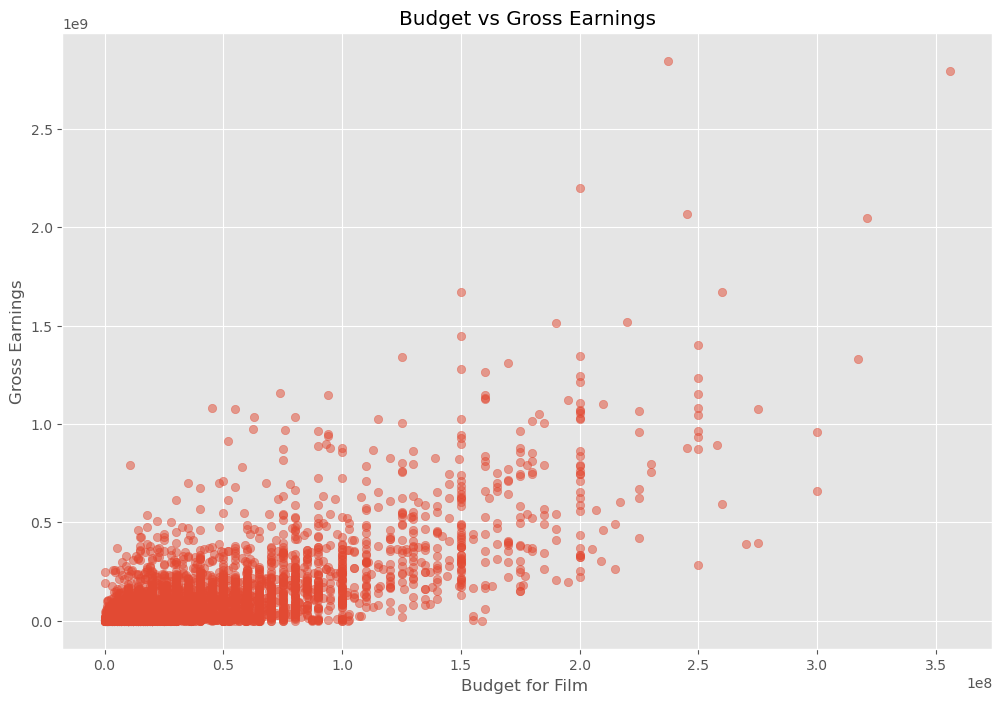

In [202]:
#Scatter Plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film ')
plt.ylabel('Gross Earnings')
plt.show()

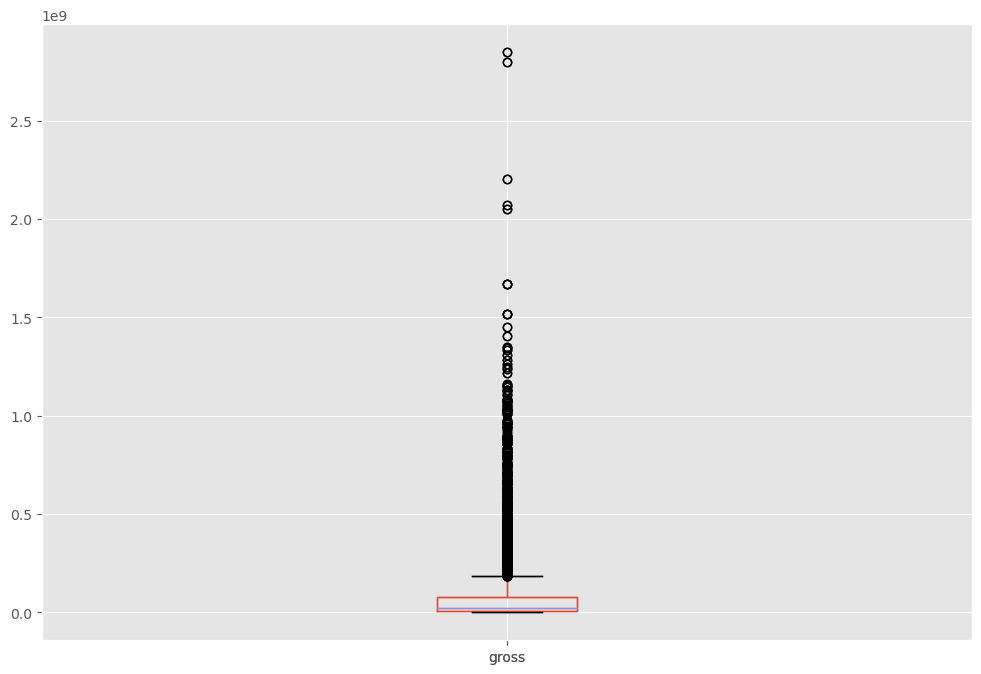

In [239]:
# Are there any Outliers?

df.boxplot(column=['gross'])
plt.show()

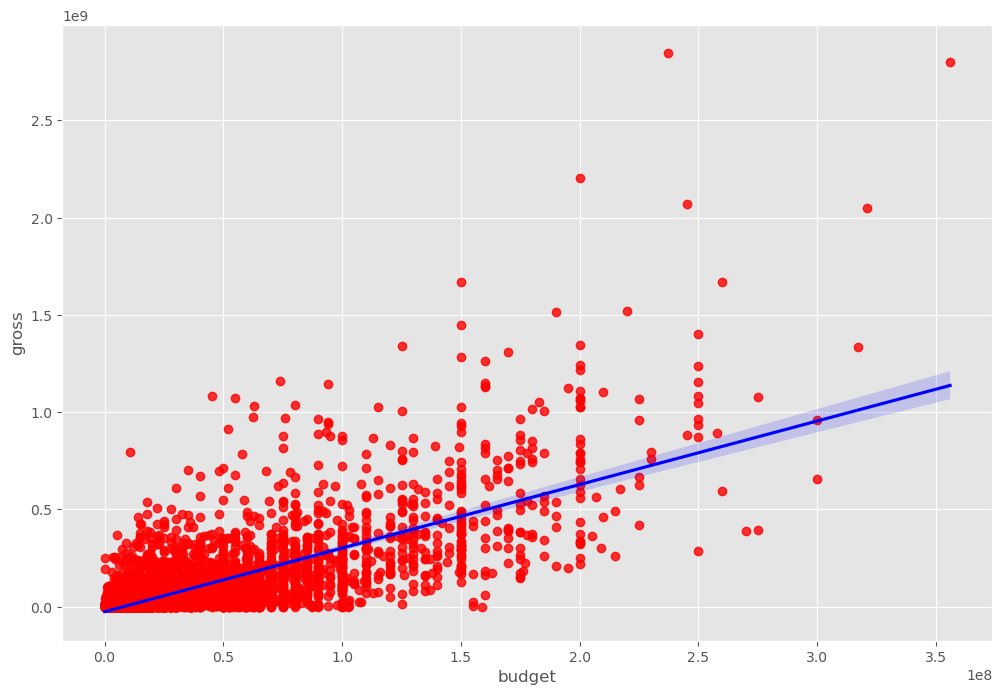

In [213]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"}) 
plt.show()

In [ ]:
# Lets Start Loooking at Correlation. (pearson, kendall, spearman)

In [227]:
 
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.094449  0.219095  0.343180  0.259164  0.114857
score    0.094449  1.000000  0.398782  0.071056  0.179144  0.381473
votes    0.219095  0.398782  1.000000  0.452053  0.631118  0.310219
budget   0.343180  0.071056  0.452053  1.000000  0.730781  0.282185
gross    0.259164  0.179144  0.631118  0.730781  1.000000  0.245394
runtime  0.114857  0.381473  0.310219  0.282185  0.245394  1.000000


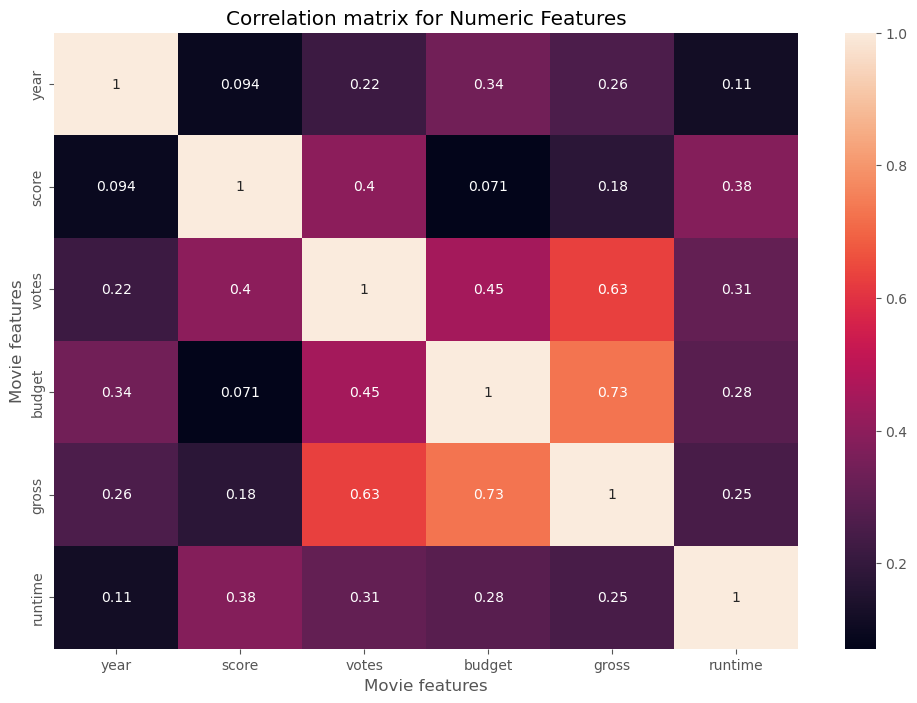

In [229]:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [245]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct,release_date
0,6382,6,6,1980,1656,8,927000,2476,3857,982,54,19000000,46998772,2182,146,0,15
1,5382,6,1,1980,1447,5,65000,2173,1566,306,54,4500000,58853106,689,104,0,19
2,4963,4,0,1980,1720,8,1200000,1064,2467,1646,54,18000000,538375067,1449,124,0,16
3,278,4,4,1980,1447,7,221000,1250,1922,2116,54,3500000,83453539,1700,88,0,19
4,994,6,4,1980,1496,7,108000,1011,501,387,54,6000000,39846344,1668,98,0,22
5,2035,6,9,1980,2430,6,123000,2420,4193,225,54,550000,39754601,1700,95,0,9
6,5383,6,0,1980,1720,7,188000,1360,799,1205,54,27000000,115229890,2145,133,0,16
7,4277,6,3,1980,683,8,330000,1756,1698,2110,54,18000000,23402427,594,129,0,36
8,5100,4,0,1980,1704,6,101000,2208,1902,821,54,54000000,108185706,833,127,1,58
9,6013,6,3,1980,2223,7,10000,2743,404,556,54,10000000,15795189,2137,100,0,10


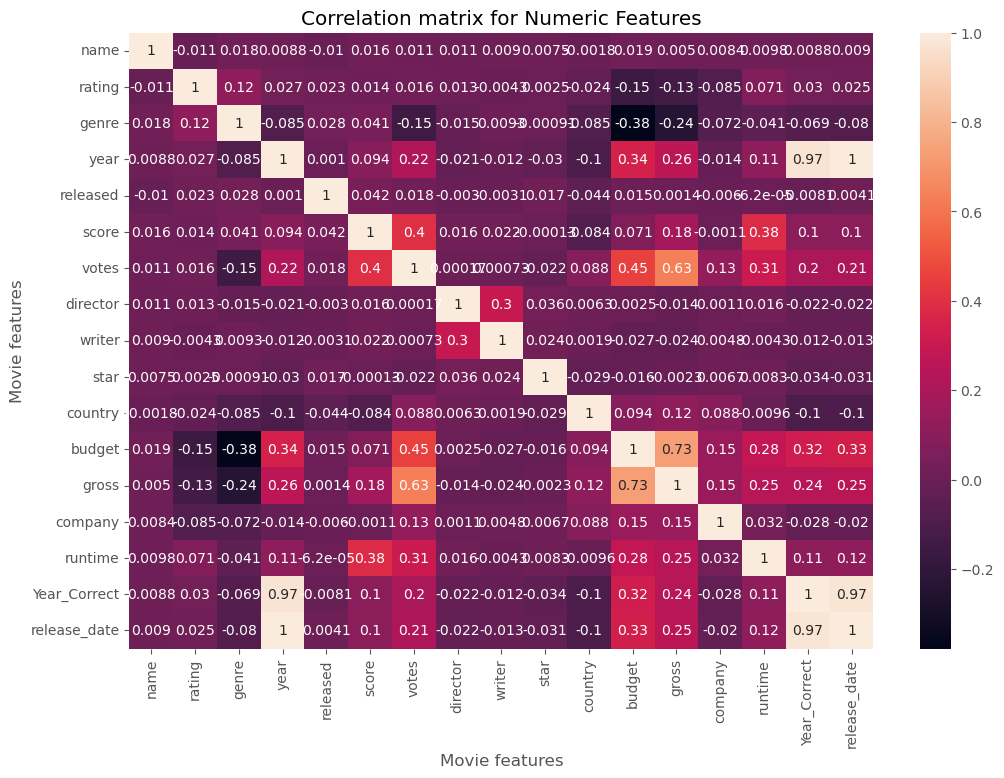

In [255]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [261]:
correlation_mat = df_numerized.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.011268
              genre           0.017938
              year            0.008842
              released       -0.010326
              score           0.016470
              votes           0.011401
              director        0.010564
              writer          0.009031
              star            0.007529
              country        -0.001770
              budget          0.018663
              gross           0.005016
              company         0.008363
              runtime         0.009797
              Year_Correct    0.008755
              release_date    0.009027
rating        name           -0.011268
              rating          1.000000
              genre           0.118677
              year            0.026610
              released        0.023242
              score           0.014440
              votes           0.015586
              director        0.013439
              writer     

In [267]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.378358
genre         budget         -0.378358
gross         genre          -0.242625
genre         gross          -0.242625
budget        rating         -0.153646
rating        budget         -0.153646
votes         genre          -0.148120
genre         votes          -0.148120
gross         rating         -0.131326
rating        gross          -0.131326
release_date  country        -0.103419
country       release_date   -0.103419
              Year_Correct   -0.102145
Year_Correct  country        -0.102145
country       year           -0.101282
year          country        -0.101282
company       rating         -0.085123
rating        company        -0.085123
year          genre          -0.084822
genre         year           -0.084822
              country        -0.084574
country       genre          -0.084574
              score          -0.084227
score         country        -0.084227
release_date  genre          -0.080456
genre         release_dat

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

In [ ]:
# Votes and Budget have the highest Correlation to Gross Earnings.